<a href="https://colab.research.google.com/github/Isaivargas/neuronalNetwork/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
# Library to display images and graphics
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0-rc3


In [0]:
write_mnist = keras.datasets.mnist
# Load keras dataset mnist to train_images,_lebes and test_images,_lebels
(train_images, train_labels), (test_images, test_labels) = write_mnist.load_data()

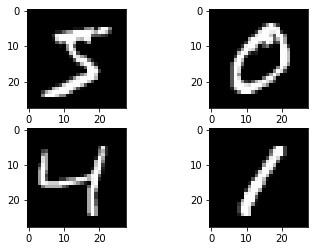

In [38]:
# plot 4 images as gray scale to show that we have load correctly the keras dataSet
# subplot grid parameters encoded as a single integer
plt.subplot(221)
plt.imshow(train_images[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(train_images[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(train_images[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(train_images[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [39]:

train_images.shape


(60000, 28, 28)

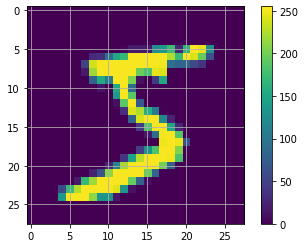

In [40]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

In [41]:
#Reshaping the array to 4-dims so that it can work with the Keras API
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images  = test_images.reshape(test_images.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
train_images /= 255
test_images /= 255

print('train_images shape:', train_images.shape)
print('Number of images in train_images',train_images.shape[0])
print('Number of images in test_images', test_images.shape[0])

train_images shape: (60000, 28, 28, 1)
Number of images in train_images 60000
Number of images in test_images 10000


In [0]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [43]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(train_images,train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 35s 589us/step - loss: 0.1977 - accuracy: 0.9401
Epoch 2/10
60000/60000 [==============================] - 35s 590us/step - loss: 0.0777 - accuracy: 0.9762
Epoch 3/10
60000/60000 [==============================] - 35s 586us/step - loss: 0.0526 - accuracy: 0.9836
Epoch 4/10
60000/60000 [==============================] - 35s 583us/step - loss: 0.0398 - accuracy: 0.9870
Epoch 5/10
60000/60000 [==============================] - 35s 587us/step - loss: 0.0302 - accuracy: 0.9902
Epoch 6/10
60000/60000 [==============================] - 35s 589us/step - loss: 0.0263 - accuracy: 0.9909
Epoch 7/10
60000/60000 [==============================] - 35s 582us/step - loss: 0.0227 - accuracy: 0.9921
Epoch 8/10
60000/60000 [==============================] - 35s 579us/step - loss: 0.0206 - accuracy: 0.9933
Epoch 9/10
60000/60000 [==============================] - 35s 578us/step - loss: 0.0171 - accuracy: 0.9940
Epoch 10/10
60000/60000 [============

In [44]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 176us/step


[0.060179825873638494, 0.9851999878883362]

NameError: ignored

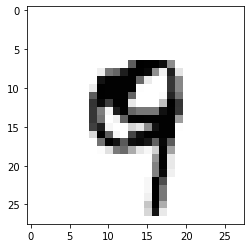

In [45]:
image_index = 4444
plt.imshow(test_images[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(test_images[image_index].reshape(1, img_rows, img_cols, 1))
print(pred.argmax())
